In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report 
from sklearn.preprocessing import LabelEncoder

In [3]:
#reading the data
bank = pd.read_csv("bank-full.csv",sep=";")



In [4]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
#drop columns which are not needed.
bank.drop(bank.columns[[0, 3, 5, 8, 9, 10, 11, 12, 13, 14]], axis=1, inplace=True)

In [6]:
#label encoder for converting categories to binary values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bank.y= le.fit_transform(bank.y.values)
bank.marital= le.fit_transform(bank.marital.values)
bank.default= le.fit_transform(bank.default.values)
bank.housing= le.fit_transform(bank.housing.values)
bank.loan= le.fit_transform(bank.loan.values)

In [7]:
bank

,job,marital,default,housing,loan,poutcome,y
0,management,1,0,1,0,unknown,0
1,technician,2,0,1,0,unknown,0
2,entrepreneur,1,0,1,1,unknown,0
3,blue-collar,1,0,1,0,unknown,0
4,unknown,2,0,0,0,unknown,0
...,...,...,...,...,...,...,...
45206,technician,1,0,0,0,unknown,1
45207,retired,0,0,0,0,unknown,1
45208,retired,1,0,0,0,success,1
45209,blue-collar,1,0,0,0,unknown,0


In [8]:
# creating one hot encoding of the categorical columns.
bank = pd.get_dummies(bank, columns =['job'])
bank = pd.get_dummies(bank, columns =['poutcome'])

In [9]:
bank 

,marital,default,housing,loan,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45209,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
bank.columns.get_loc("job_unknown")

16

In [11]:
bank.columns.get_loc("poutcome_unknown")

20

In [12]:
bank.drop(bank.columns[[16, 20]], axis=1, inplace=True)

In [13]:
bank 

,marital,default,housing,loan,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,poutcome_failure,poutcome_other,poutcome_success
0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
45207,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
45208,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
45209,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
bank.columns

Index(['marital', 'default', 'housing', 'loan', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'poutcome_failure',
       'poutcome_other', 'poutcome_success'],
      dtype='object')

In [15]:
bank=bank[['y','marital', 'default', 'housing', 'loan', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'poutcome_failure',
       'poutcome_other', 'poutcome_success']]

In [16]:
bank

,y,marital,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,poutcome_failure,poutcome_other,poutcome_success
0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
45207,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
45208,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
45209,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
#creating feature array splitting it into X Y
x = bank.iloc[:,1:]
x.head()

,marital,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,poutcome_failure,poutcome_other,poutcome_success
0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
z = bank.iloc[:,0]
z.head() 

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [19]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, z_train, z_test = train_test_split(x, z, test_size = 0.25, random_state = 0)

In [20]:
#Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',random_state=0)

classifier.fit(x_train, z_train)

LogisticRegression(random_state=0)

In [21]:
classifier.coef_  # coefficients of features 

array([[ 0.15639878, -0.34111024, -0.72232563, -0.51765579,  0.22044758,
        -0.1675291 , -0.0943573 , -0.41709887,  0.20522503,  0.63099055,
         0.1247017 , -0.02434741,  0.68504178,  0.07178607,  0.43483185,
         0.44647722,  0.62130589,  2.72384122]])

In [22]:
classifier.predict_proba (x) # Probability values 

array([[0.92690918, 0.07309082],
       [0.92533836, 0.07466164],
       [0.96634603, 0.03365397],
       ...,
       [0.20886517, 0.79113483],
       [0.89940052, 0.10059948],
       [0.81699263, 0.18300737]])

In [23]:
predicted_z = classifier.predict(x_test)
predicted_z

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(z_test, predicted_z)
print(cm)
accuracy_score(z_test, predicted_z)

[[9849  129]
 [1106  219]]


0.8907369724851809

In [28]:
import statsmodels.api as sm  

In [29]:
logit = sm.Logit(z, x)  

In [30]:
logit.fit().summary() 

Optimization terminated successfully.
         Current function value: 0.321740
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45193
Method:                           MLE   Df Model:                           17
Date:                Tue, 19 Jan 2021   Pseudo R-squ.:                  0.1084
Time:                        19:10:27   Log-Likelihood:                -14546.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
marital               0.0721      0.026      2.817      0.005       0.022       0.122
default              -0.3313      0.146     -2.266      0.023      -0.618      -0.045
housing              -0.7140      0.033    -21.456      0.000      -0.779      -0.649
loan                 -0.4896      0.051     -9.525      0.000      -0.590      -0.389
job_admin.           -1.8898      0.059    -32.261      0.000      -2.005      -1.775
job_blue-collar      -2.2700      0.055    -41.546      0.000      -2.377      -2.163
job_entrepreneur     -2.1788      0.103    -21.231      0.000      -2.380      -1.978
job_housemaid        -2.3751      0.108    -22.034      0.000      -2.586      -2.164
job_management       -1.8472      0.047    -39.101      0.000      -1.940      -1.755
job_retired          -1.4530      0.060    -24.184      0.000      -1.571      -1.335
job_self-employed    -2.0017      0.089    -22.391      0.000      -2.177      -1.826
job_services         -2.1144      0.068    -31.269      0.000      -2.247      -1.982
job_student          -1.2922      0.094    -13.755      0.000      -1.476      -1.108
job_technician       -2.0234      0.053    -38.183      0.000      -2.127      -1.920
job_unemployed       -1.7831      0.089    -20.083      0.000      -1.957      -1.609
poutcome_failure      0.4409      0.048      9.190      0.000       0.347       0.535
poutcome_other        0.7207      0.067     10.782      0.000       0.590       0.852
poutcome_success      2.6716      0.059     45.623      0.000       2.557       2.786
=====================================================================================
"""

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(z,classifier.predict(x))
Logit_roc_score 

0.5793448552906566

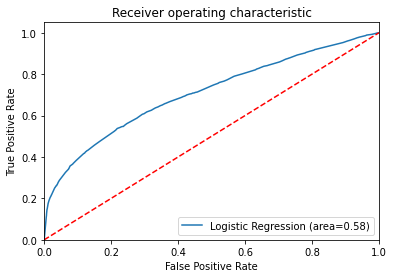

In [34]:
fpr, tpr, thresholds = roc_curve(z,classifier.predict_proba(x)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  